# Modeling

In [1]:
# Copied and pasted from my imports from project 3, 
# delete if we dont need(Aerika)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.preprocessing import StandardScaler, PowerTransformer, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import TransformerMixin

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import stop_words

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression, LinearRegression, RidgeCV

from sklearn.naive_bayes import MultinomialNB, ComplementNB, GaussianNB, BernoulliNB

from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, mean_squared_error

from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestRegressor

from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.tokenize import ToktokTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords 

import regex as re

from scipy.stats import ttest_ind
from scipy.spatial import cKDTree, KDTree

In [95]:
data = pd.read_csv('../data/data_income_jerry.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,alias,categories,city,id,latitude,longitude,price,rating,review_count,zip_code,avg_agi
0,重庆特色小面-chongqing-special-noodles-san-gabriel-3,"['noodles', 'chinese']",San Gabriel,mm6l24khOfXhKqn4pKVojA,34.103070,-118.091840,1,4.0,204.0,91776,37.21102
1,yung-ho-cafe-san-gabriel-2,"['taiwanese', 'chinese', 'breakfast_brunch']",San Gabriel,zO8V4fi49QQMn4Sa_0OS9g,34.081429,-118.084785,1,3.0,263.0,91776,37.21102
2,yun-nan-168-san-gabriel,['chinese'],San Gabriel,6J_4QelYHplaLHzof1VEyg,34.080849,-118.090324,1,3.0,4.0,91776,37.21102
3,yum-cha-cafe-san-gabriel,"['dimsum', 'hotdogs']",San Gabriel,KD_fdBnwN3TbJYJ8mcvq4Q,34.078899,-118.092026,1,3.0,138.0,91776,37.21102
4,yuk-dae-jang-san-gabriel-2,['korean'],San Gabriel,DwvljRkxkMEljQBYX-MeTw,34.102080,-118.109870,2,4.5,158.0,91776,37.21102


In [155]:
data[data['zip_code'] == 92845]

,alias,categories,city,id,latitude,longitude,price,rating,review_count,zip_code,avg_agi
28475,a-bite-of-jersey-garden-grove-2,"['cheesesteaks', 'sandwiches', 'chicken_wings']",Garden Grove,Gr4TtbfG10vmgOkFdnadYw,33.780935,-118.041427,1,4.0,161.0,92845,72.275806


In [126]:
DESCRIBE = data.describe()
DESCRIBE

,latitude,longitude,price,rating,review_count,zip_code,avg_agi
count,28476.000000,28476.000000,28476.000000,28476.000000,28476.000000,28476.000000,28476.000000
mean,34.048928,-118.242851,1.479913,3.586792,242.074062,90819.865290,75.439776
std,0.160146,0.204438,0.576493,0.812550,420.322936,773.298386,73.385458
min,33.167953,-119.174788,1.000000,0.000000,0.000000,90001.000000,23.390537
25%,33.948473,-118.385123,1.000000,3.000000,37.000000,90064.000000,39.288225
50%,34.051688,-118.263453,1.000000,4.000000,108.000000,90701.000000,55.424814
75%,34.131785,-118.122028,2.000000,4.000000,281.000000,91361.000000,85.202214
max,34.857667,-117.225868,4.000000,5.000000,16662.000000,93591.000000,811.582132


In [127]:
MEAN = DESCRIBE.loc['mean', 'price']
STDEV = DESCRIBE.loc['std', 'price']

In [157]:
def businesss_scaler(df, zipcode):
    
    mean = df[df['zip_code'] == zipcode]['price'].mean()
    agi = df[df['zip_code'] == zipcode]['avg_agi'].mean()
    
    count = df[df['zip_code'] == zipcode]['price'].count()
    
    z = (mean - MEAN) / STDEV
    
    return z, agi, count

In [177]:
zips = data['zip_code'].unique()
len(zips)

340

In [178]:
prices = []
agis = []
zs = []
    
for z in zips:
    x, y, c = businesss_scaler(data, z)
    if c > 50:
        prices.append(x)
        agis.append(y)
        zs.append(z)

In [141]:
prices

[-0.0965674455466888,
 -0.28973359270446297,
 0.24912085516184282,
 0.008876132727982829,
 0.11590084988737036,
 0.2571197196634542,
 0.7615110420216531,
 -0.02456140354353931,
 0.24271193236451424,
 -0.16013370960342266,
 0.0852036777758422,
 0.004936244008095692,
 -0.03949751397047858,
 -0.3916251319162794,
 -0.3029519210944526,
 0.003868124825918409,
 0.902156357036994,
 -0.2781043277309178,
 -0.15504146450829975,
 -0.26988793475751294,
 1.0803070893897588,
 0.055013645665522484,
 0.40234899463784507,
 0.024136015974146014,
 -0.03949751397047858,
 0.4034515108784311,
 0.09606565940985443,
 0.02227383073329161,
 0.1457031088592459,
 -0.14668699989911357,
 0.2349926832462747,
 0.2735001167670814,
 0.3405869337743022,
 -0.4459982169442525,
 -0.5458788862513848,
 -0.013340461998048498,
 0.3155680061678592,
 0.34536297002152927,
 -0.5170827308450816,
 -0.055501499716767606,
 0.4618283323351192,
 0.41787003545286766,
 0.7286938018514068,
 -0.3867667960781319,
 -0.010371776877705538,
 -0.2

In [179]:
summary_df = pd.DataFrame()

In [180]:
summary_df['zip_code'] = zs
summary_df['price'] = prices
summary_df['avg_agi'] = agis

In [181]:
summary_df = summary_df.sort_values(by='price')

In [182]:
summary_df.shape

(223, 3)

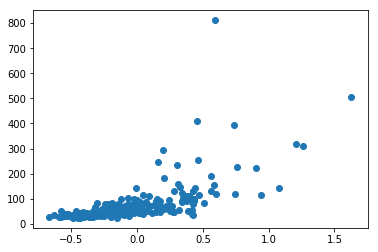

In [183]:
plt.scatter(x=summary_df['price'], y=summary_df['avg_agi'])

In [97]:
df = data.copy()
df.drop(['alias', 'city', 'id'], axis=1, inplace=True)

In [98]:
df['zip_code'] = df['zip_code'].astype(str)

In [99]:
df = df.dropna(axis=0, how='any')

In [100]:
df[df['zip_code'] == '90001']

,categories,latitude,longitude,price,rating,review_count,zip_code,avg_agi
25086,"['foodtrucks', 'comfortfood', 'sandwiches']",33.973970,-118.249890,2,4.0,61.0,90001,25.152933
25087,['chicken_wings'],33.988138,-118.257114,2,3.0,47.0,90001,25.152933
25088,"['donuts', 'coffee', 'sandwiches']",33.974855,-118.238347,1,2.5,15.0,90001,25.152933
25089,"['hotdogs', 'asianfusion']",33.988138,-118.257114,1,2.5,38.0,90001,25.152933
25090,"['foodtrucks', 'japanese', 'hotdog']",33.978828,-118.249931,2,4.5,180.0,90001,25.152933
25091,"['streetvendors', 'vietnamese']",33.974087,-118.249832,1,5.0,9.0,90001,25.152933
25092,"['foodtrucks', 'tradamerican']",33.979080,-118.250090,1,3.5,1581.0,90001,25.152933
25093,"['foodtrucks', 'burgers', 'hotdog']",33.979080,-118.250090,1,3.5,81.0,90001,25.152933
25094,['mexican'],33.982125,-118.238630,1,4.0,3.0,90001,25.152933
25095,"['foodtrucks', 'mexican']",33.974580,-118.247460,1,4.0,7.0,90001,25.152933


# use scipy cKDTree to calculate nearest neighbor distances

In [ ]:
# https://stackoverflow.com/questions/12923586/
# https://stackoverflow.com/questions/36798782/

coords = df.copy()
coords = coords[['latitude', 'longitude']]

In [ ]:
temp_point = list(coords.iloc[4])

In [ ]:
# making the tree

distance_tree = cKDTree(coords)

In [ ]:
# returns six closest points, including itself
# first array shows distances
# second array appears to show which indices are closest?

_, idx = distance_tree.query(temp_point, k=20)
for i in idx:
    print(data.iloc[i])

In [ ]:
coords[KDTree(coords).query(list(coords.iloc[0]))[1]]

# use CountVectorizer

In [101]:
X = df[['categories', 'price', 'rating', 'review_count', 'zip_code']]
y = df['avg_agi']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=111)

In [103]:
cvect = CountVectorizer()

In [104]:
V_train = cvect.fit_transform(X_train['categories'])

In [105]:
categories = list(cvect.get_feature_names())

In [106]:
categories

['acaibowls',
 'accessories',
 'acupuncture',
 'afghani',
 'african',
 'airportlounges',
 'amusementparks',
 'antiques',
 'arabian',
 'arcades',
 'argentine',
 'armenian',
 'artmuseums',
 'arts',
 'artsupplies',
 'asianfusion',
 'attractionfarms',
 'australian',
 'bagels',
 'bakeries',
 'bangladeshi',
 'banks',
 'barbers',
 'bars',
 'basque',
 'battingcages',
 'bbq',
 'beachequipmentrental',
 'beaches',
 'bedbreakfast',
 'beer_and_wine',
 'beerbar',
 'beergardens',
 'belgian',
 'bikerentals',
 'bikes',
 'biketours',
 'bookstores',
 'bowling',
 'brasseries',
 'brazilian',
 'breakfast_brunch',
 'breweries',
 'brewpubs',
 'british',
 'bubbletea',
 'buffets',
 'burgers',
 'burmese',
 'butcher',
 'cafes',
 'cafeteria',
 'cajun',
 'cakeshop',
 'cambodian',
 'candy',
 'cantonese',
 'caribbean',
 'carwash',
 'casinos',
 'catering',
 'cheese',
 'cheesesteaks',
 'chicken_wings',
 'chickenshop',
 'chinese',
 'chocolate',
 'cigarbars',
 'clubcrawl',
 'cocktailbars',
 'coffee',
 'coffeeroasteries',

In [107]:
V_df = pd.DataFrame(data=V_train.toarray(), columns=categories)

In [108]:
V_df.shape

(21357, 334)

In [109]:
X_train.shape

(21357, 5)

In [110]:
X_train = X_train.join(V_df)

In [119]:
X_train[X_train['zip_code'] == '90001']

,categories,price,rating,review_count,zip_code,acaibowls,accessories,acupuncture,afghani,african,airportlounges,amusementparks,antiques,arabian,arcades,argentine,armenian,artmuseums,arts,artsupplies,asianfusion,attractionfarms,australian,bagels,bakeries,bangladeshi,banks,barbers,bars,basque,battingcages,bbq,beachequipmentrental,beaches,bedbreakfast,beer_and_wine,beerbar,beergardens,belgian,bikerentals,bikes,biketours,bookstores,bowling,brasseries,brazilian,breakfast_brunch,breweries,brewpubs,british,bubbletea,buffets,burgers,burmese,butcher,cafes,cafeteria,cajun,cakeshop,cambodian,candy,cantonese,caribbean,carwash,casinos,catering,cheese,cheesesteaks,chicken_wings,chickenshop,chinese,chocolate,cigarbars,clubcrawl,cocktailbars,coffee,coffeeroasteries,colombian,comedyclubs,comfortfood,convenience,conveyorsushi,cookingclasses,cookingschools,countryclubs,creperies,cuban,cupcakes,customcakes,danceclubs,delis,desserts,dimsum,diners,dinnertheater,distilleries,divebars,diyfood,djs,donuts,drugstores,egyptian,electronics,empanadas,ethiopian,eventplanning,eventservices,falafel,farmersmarket,fashion,festivals,filipino,fishnchips,fleamarkets,floraldesigners,florists,flowers,fondue,food,food_court,fooddeliveryservices,foodstands,foodtrucks,french,furniture,galleries,gardening,gardens,gastropubs,gaybars,gelato,georgian,german,giftshops,gluten_free,golf,gourmet,greek,grocery,gyms,hainan,halal,hawaiian,headshops,healthmarkets,herbalshops,herbsandspices,himalayan,hkcafe,hobbyshops,homedecor,honduran,hookah_bars,horseracing,hotdog,hotdogs,hotels,hotpot,icecream,icedelivery,importedfood,indonesian,indoor_playcenter,indpak,interiordesign,internetcafe,intlgrocery,irish,irish_pubs,italian,izakaya,japacurry,japanese,jazzandblues,jewelry,juicebars,karaoke,kebab,kids_activities,kitchensupplies,kombucha,korean,kosher,landmarks,laotian,latin,lebanese,localflavor,lounges,macarons,magicians,malaysian,markets,masonry_concrete,massage,meats,meditationcenters,mediterranean,menscloth,mex,mexican,mideastern,modern_european,mongolian,moroccan,movietheaters,museums,musicians,musicinstrumentservices,musicvenues,newamerican,newmexican,nicaraguan,nightlife,nonprofit,noodles,nutritionists,oliveoil,organic_stores,pakistani,panasian,pancakes,parks,partyequipmentrentals,partysupplies,pastashops,paydayloans,persian,personalchefs,peruvian,petadoption,petstore,pettingzoos,pharmacy,piadina,pianobars,pizza,poke,polish,polynesian,poolbilliards,poolhalls,popuprestaurants,popupshops,portuguese,poutineries,pretzels,pubs,puertorican,pumpkinpatches,racingexperience,ramen,raw_food,religiousitems,restaurants,retirement_homes,russian,salad,salvadoran,sandwiches,scandinavian,seafood,seafoodmarkets,servicestations,shanghainese,shavedice,shavedsnow,shopping,shoppingcenters,sicilian,singaporean,skate_parks,skateshops,smokehouse,social_clubs,soulfood,soup,southern,souvenirs,spanish,speakeasies,specialtyschools,sportgoods,sportsbars,sportswear,srilankan,stadiumsarenas,steak,streetvendors,supperclubs,suppliesrestaurant,sushi,swimmingpools,syrian,szechuan,tabletopgames,tacos,taiwanese,tapas,tapasmallplates,tcm,tea,teambuilding,tennis,teppanyaki,tex,thai,theater,themedcafes,tikibars,tobaccoshops,toys,tradamerican,turkish,ukrainian,uzbek,vapeshops,vegan,vegetarian,venezuelan,venues,veteransorganizations,vietnamese,vintage,vitaminssupplements,waffles,waterdelivery,waterstores,wedding_planning,whiskeybars,wholesale_stores,wholesalers,wine_bars,wineries,winetasteclasses,winetastingroom,womenscloth,wraps,yoga
25164,['mexican'],1,5.0,2.0,90001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [112]:
# https://stackoverflow.com/questions/42935334/

X_train.iloc[:, 5:-1] = X_train.iloc[:, 5:-1].mul(X_train.iloc[:, 1], axis=0)

In [113]:
X_train_nan = X_train.replace(0, np.NaN)

In [114]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [115]:
X_train_nan.describe().T[X_train_nan.describe().T['count'] > 200].sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
price,21357.0,1.482277,0.576858,1.0,1.0,1.0,2.0,4.0
review_count,21356.0,241.375445,425.898194,1.0,37.0,107.0,280.0,16662.0
rating,21356.0,3.589062,0.813550,1.0,3.0,4.0,4.0,5.0
mexican,2204.0,1.505898,0.582279,1.0,1.0,1.0,2.0,4.0
coffee,2075.0,1.493976,0.575402,1.0,1.0,1.0,2.0,4.0
hotdogs,1700.0,1.485294,0.569291,1.0,1.0,1.0,2.0,4.0
sandwiches,1502.0,1.494674,0.587147,1.0,1.0,1.0,2.0,4.0
burgers,1367.0,1.481346,0.572218,1.0,1.0,1.0,2.0,4.0
breakfast_brunch,1314.0,1.485540,0.592042,1.0,1.0,1.0,2.0,4.0
pizza,1111.0,1.488749,0.587872,1.0,1.0,1.0,2.0,4.0


In [116]:
X_train_nan.describe().T[X_train_nan.describe().T['count'] > 200].sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
review_count,21356.0,241.375445,425.898194,1.0,37.0,107.0,280.0,16662.0
rating,21356.0,3.589062,0.813550,1.0,3.0,4.0,4.0,5.0
cocktailbars,252.0,1.539683,0.613926,1.0,1.0,1.0,2.0,4.0
sportsbars,262.0,1.530534,0.610432,1.0,1.0,1.0,2.0,4.0
convenience,348.0,1.522989,0.609285,1.0,1.0,1.0,2.0,4.0
bbq,364.0,1.519231,0.600425,1.0,1.0,1.0,2.0,4.0
thai,326.0,1.512270,0.580321,1.0,1.0,1.0,2.0,4.0
mexican,2204.0,1.505898,0.582279,1.0,1.0,1.0,2.0,4.0
tradamerican,829.0,1.504222,0.591031,1.0,1.0,1.0,2.0,4.0
korean,413.0,1.501211,0.589655,1.0,1.0,1.0,2.0,4.0


In [117]:
X_train_nan[X_train_nan['zip_code'] == '90001'].describe().T.sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
review_count,72.0,56.333333,188.292850,1.0,7.75,18.5,42.5,1581.0
rating,72.0,3.604167,1.047927,1.5,3.00,4.0,4.5,5.0
price,72.0,1.291667,0.457719,1.0,1.00,1.0,2.0,2.0
acaibowls,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accessories,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acupuncture,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
afghani,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
african,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airportlounges,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amusementparks,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
X_train[X_train['zip_code'] == '90001']

,categories,price,rating,review_count,zip_code,acaibowls,accessories,acupuncture,afghani,african,airportlounges,amusementparks,antiques,arabian,arcades,argentine,armenian,artmuseums,arts,artsupplies,asianfusion,attractionfarms,australian,bagels,bakeries,bangladeshi,banks,barbers,bars,basque,battingcages,bbq,beachequipmentrental,beaches,bedbreakfast,beer_and_wine,beerbar,beergardens,belgian,bikerentals,bikes,biketours,bookstores,bowling,brasseries,brazilian,breakfast_brunch,breweries,brewpubs,british,bubbletea,buffets,burgers,burmese,butcher,cafes,cafeteria,cajun,cakeshop,cambodian,candy,cantonese,caribbean,carwash,casinos,catering,cheese,cheesesteaks,chicken_wings,chickenshop,chinese,chocolate,cigarbars,clubcrawl,cocktailbars,coffee,coffeeroasteries,colombian,comedyclubs,comfortfood,convenience,conveyorsushi,cookingclasses,cookingschools,countryclubs,creperies,cuban,cupcakes,customcakes,danceclubs,delis,desserts,dimsum,diners,dinnertheater,distilleries,divebars,diyfood,djs,donuts,drugstores,egyptian,electronics,empanadas,ethiopian,eventplanning,eventservices,falafel,farmersmarket,fashion,festivals,filipino,fishnchips,fleamarkets,floraldesigners,florists,flowers,fondue,food,food_court,fooddeliveryservices,foodstands,foodtrucks,french,furniture,galleries,gardening,gardens,gastropubs,gaybars,gelato,georgian,german,giftshops,gluten_free,golf,gourmet,greek,grocery,gyms,hainan,halal,hawaiian,headshops,healthmarkets,herbalshops,herbsandspices,himalayan,hkcafe,hobbyshops,homedecor,honduran,hookah_bars,horseracing,hotdog,hotdogs,hotels,hotpot,icecream,icedelivery,importedfood,indonesian,indoor_playcenter,indpak,interiordesign,internetcafe,intlgrocery,irish,irish_pubs,italian,izakaya,japacurry,japanese,jazzandblues,jewelry,juicebars,karaoke,kebab,kids_activities,kitchensupplies,kombucha,korean,kosher,landmarks,laotian,latin,lebanese,localflavor,lounges,macarons,magicians,malaysian,markets,masonry_concrete,massage,meats,meditationcenters,mediterranean,menscloth,mex,mexican,mideastern,modern_european,mongolian,moroccan,movietheaters,museums,musicians,musicinstrumentservices,musicvenues,newamerican,newmexican,nicaraguan,nightlife,nonprofit,noodles,nutritionists,oliveoil,organic_stores,pakistani,panasian,pancakes,parks,partyequipmentrentals,partysupplies,pastashops,paydayloans,persian,personalchefs,peruvian,petadoption,petstore,pettingzoos,pharmacy,piadina,pianobars,pizza,poke,polish,polynesian,poolbilliards,poolhalls,popuprestaurants,popupshops,portuguese,poutineries,pretzels,pubs,puertorican,pumpkinpatches,racingexperience,ramen,raw_food,religiousitems,restaurants,retirement_homes,russian,salad,salvadoran,sandwiches,scandinavian,seafood,seafoodmarkets,servicestations,shanghainese,shavedice,shavedsnow,shopping,shoppingcenters,sicilian,singaporean,skate_parks,skateshops,smokehouse,social_clubs,soulfood,soup,southern,souvenirs,spanish,speakeasies,specialtyschools,sportgoods,sportsbars,sportswear,srilankan,stadiumsarenas,steak,streetvendors,supperclubs,suppliesrestaurant,sushi,swimmingpools,syrian,szechuan,tabletopgames,tacos,taiwanese,tapas,tapasmallplates,tcm,tea,teambuilding,tennis,teppanyaki,tex,thai,theater,themedcafes,tikibars,tobaccoshops,toys,tradamerican,turkish,ukrainian,uzbek,vapeshops,vegan,vegetarian,venezuelan,venues,veteransorganizations,vietnamese,vintage,vitaminssupplements,waffles,waterdelivery,waterstores,wedding_planning,whiskeybars,wholesale_stores,wholesalers,wine_bars,wineries,winetasteclasses,winetastingroom,womenscloth,wraps,yoga
25164,['mexican'],1,5.0,2.0,90001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
def numeric_filter(df):
    features = ['price', 'rating', 'review_count']
    return df[features]

Numeric = FunctionTransformer(numeric_filter, validate=False)

In [ ]:
def category_filter(df):
    return df['categories']

Categories = FunctionTransformer(category_filter, validate=False)

In [ ]:
numeric_transformer = Pipeline([
    ('num_filt', Numeric),
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('cat_filt', Categories),
    ('cvect', CountVectorizer())
])

In [ ]:
pipe = Pipeline([
    ('union', FeatureUnion([
        ('num', numeric_transformer),
        ('cat', categorical_transformer)
    ])),
    ('rfr', RandomForestRegressor(n_estimators=10,
                                  verbose=1))
])

In [ ]:
pipe.fit_transform(X_train, y_train)

In [ ]:
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

In [ ]:
list(pipe.named_steps['rfr'].feature_importances_)

In [ ]:
pipe.named_steps['union'].get_feature_names()

In [ ]:
sns.heatmap(df.corr(),
           annot = True,
           cmap = 'coolwarm')

In [ ]:
plt.figure(figsize=(21, 15))
plt.scatter(df['longitude'], df['latitude'], s=2, alpha=0.2)

# KMeans Clustering

In [ ]:
df._get_numeric_data()

In [ ]:
# Try to pick interesting columns for clustering

sns.pairplot(df._get_numeric_data())

In [ ]:
# Function to create KMeans Clustering for 2 features from original dataframe

def kmean(var1, var2):
    features = [var1, var2]
    X = df[features]

    sc = StandardScaler()
    X = sc.fit_transform(X)

    km = KMeans(n_clusters=3,
           random_state=42)
    km.fit(X)

    df_copy = df.copy()
    df_copy['cluster'] = km.labels_

    print(f' Cluster Centers: \n{km.cluster_centers_}')

    centroids = pd.DataFrame(
        sc.inverse_transform(km.cluster_centers_),
        columns = features
    )

    print(f' Centroids for Plot: \n{centroids}')


    # Visualizing Clusters
    plt.figure(figsize=(7,7));

    ## Plot scatter by cluster / color, and centroids
    colors = ["red", "green", "blue"]
    df_copy['color'] = df_copy['cluster'].map(lambda p: colors[p])

    ax = df.plot(    
        kind="scatter", 
        x=var1, y=var2,
        figsize=(10,8),
        c = df_copy['color']
    )

    centroids.plot(
        kind="scatter", 
        x=var1, y=var2, 
        marker="*", c=["r", "g", "b"], s=550,
        ax=ax
    );

In [ ]:
kmean('latitude', 'longitude')

In [ ]:
kmean('longitude', 'zip_code')

In [ ]:
kmean('latitude', 'zip_code')

# Linear Regression Model
- Only price, rating, dummied zip_code as features.
- Target: ave_agi

In [ ]:
df['zip_code'] = df['zip_code'].astype(int).astype(str)

In [ ]:
df_dummied_city = pd.get_dummies(data=df,columns=['zip_code'])

In [ ]:
df_dummied_city._get_numeric_data().head(2)

In [ ]:
features = df_dummied_city._get_numeric_data().drop(columns=['ave_agi', 'review_count', 'latitude', 'longitude', 'price*rating'])

X = features
y = df_dummied_city['ave_agi']


X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state = 42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
lr.score(X_train, y_train)

In [ ]:
lr.score(X_test, y_test)

In [ ]:
cross_val_score(lr, X_train, y_train, cv = 5).mean()

# Linear Regression Model
- This was really really really bad - Aerika

In [ ]:
df_dummied_city = pd.get_dummies(data=df,columns=['city'])

In [ ]:
df_dummied_city.head(2)

In [ ]:
features = df_dummied_city._get_numeric_data().drop(columns=['ave_agi'])

X = features
y = df_dummied_city['ave_agi']


X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state = 42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
lr.score(X_train, y_train)

In [ ]:
lr.score(X_test, y_test)

In [ ]:
cross_val_score(lr, X_train, y_train, cv = 5).mean()

Jerry's code from previous project, trying to use it to perform a bunch of different models for this project  
Still need to tweak functions so they can be used for this project.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.preprocessing import StandardScaler, PowerTransformer, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# numeric columns that seem like continuous features.
numeric_features = ['price', 'rating', 'review_count', 'ave_agi']

# columns that should get dummied out
categorical_features = ['zip_code']

In [ ]:
# transforms numeric columns
# just comment out whichever transformers you want to leave out

numeric_transformer = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False, 
                                interaction_only=False)),
    ('power', PowerTransformer()),
#     ('imputer', SimpleImputer(strategy=)),
    ('scaler', StandardScaler())
])

In [ ]:
# transforms categorical columns into dummy columns

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
filter_transformer = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [ ]:
# put alias as keys to dictionary
# put instantiation of model, including parameters you don't want to gridsearch, as value

est_dict = {
    'logreg': LogisticRegression(solver='lbfgs'),
    'knn': KNeighborsClassifier(),
    'rand': RandomForestClassifier(n_estimators=100, random_state=111),
    'extra': ExtraTreesClassifier(n_estimators=100, random_state=111),
    'ada': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=111)
}

# list of aliases so we can loop through models
estimators = ['logreg', 'knn', 'rand', 'extra', 'ada']

In [ ]:
'''
to access parameters, follow this format:

grid_params = {'filter__num__poly__param': [],
    'estimatoralias__param': []
    }
'''

pipe = Pipeline([
    ('filter', filter_transformer),
    ('estimator', Estimator())
])